# Semi-Analytic Solutions for Simply-Supported Beams

In [68]:
import matplotlib.pyplot as plt

labels = [r"$v$", r"$\theta$", r"$\kappa$", r"$\gamma$", r"$M$", r"$V$"]
colors = ["b", "b", "g", "g", "r", "r"]

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
    }
)


def plot(x, res):
    fig, axs = plt.subplots(6, 1, figsize=(4, 6), dpi=200, sharex=True)
    for i in range(len(labels)):
        axs[i].plot(x, res[:, i], colors[i])
        axs[i].set_xlabel("$x$")
        axs[i].set_ylabel(labels[i])
    plt.subplots_adjust(hspace=0.1)

    fig.tight_layout()

In [69]:
import numpy as np
from sigmaepsilon.fourier import LoadGroup, PointLoad, LineLoad

L = 1000.0  # geometry
w, h = 20.0, 80.0  # rectangular cross-section
E, nu = 210000.0, 0.25  # material

I = w * h**3 / 12
A = w * h
EI = E * I
G = E / (2 * (1 + nu))
GA = G * A * 5 / 6

loads = LoadGroup(
    concentrated=LoadGroup(
        LC1=PointLoad(x=L / 2, v=[1.0, 0.0]),
        LC5=PointLoad(x=L / 2, v=[0.0, 1.0]),
    ),
    distributed=LoadGroup(
        LC2=LineLoad(x=[0, L], v=[1.0, 0.0]),
        LC6=LineLoad(x=[L / 2, L], v=[0.0, 1.0]),
        LC3=LineLoad(x=[L / 2, L], v=["x", 0]),
    ),
)
loads.lock()

x = np.linspace(0, L, 500)

### Timoshenko Beam

In [70]:
from sigmaepsilon.fourier import NavierBeam

beam = NavierBeam(L, 100, EI=EI, GA=GA)
solution = beam.solve(loads, x)

In [71]:
solution["concentrated", "LC1"].shape, x.shape

((500, 6), (500,))

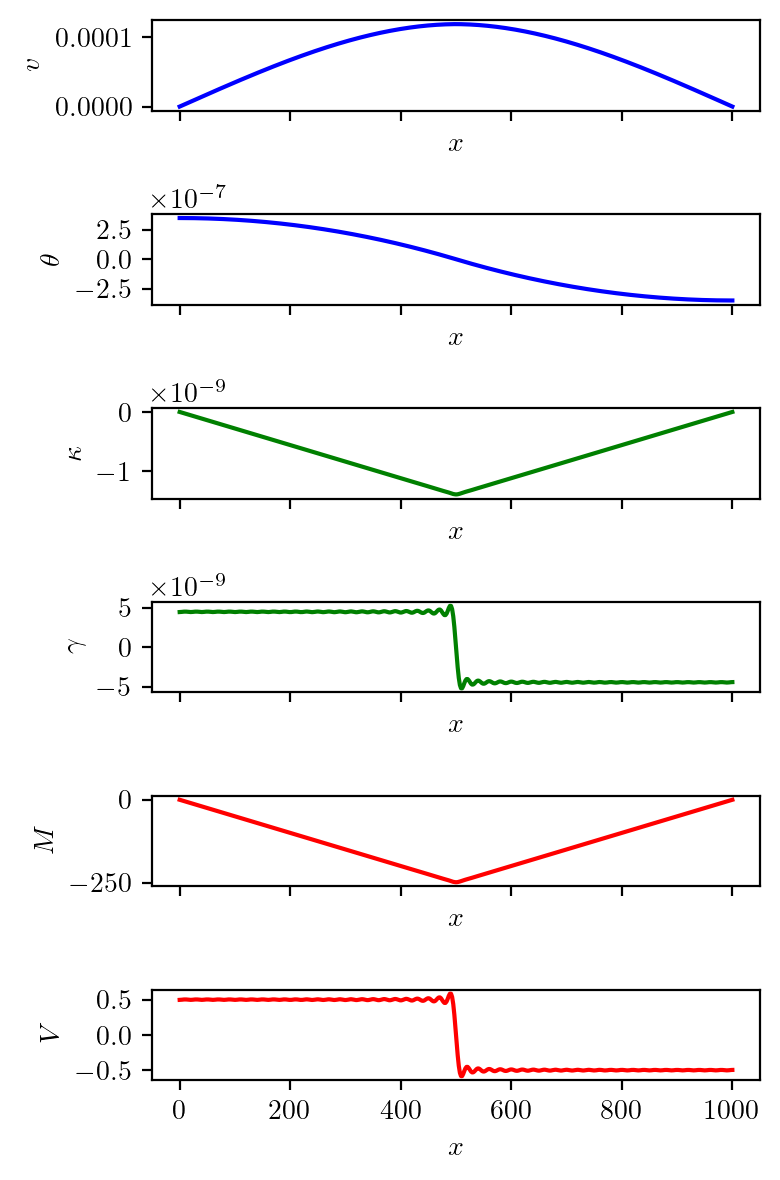

In [72]:
plot(x, solution["concentrated", "LC1"])

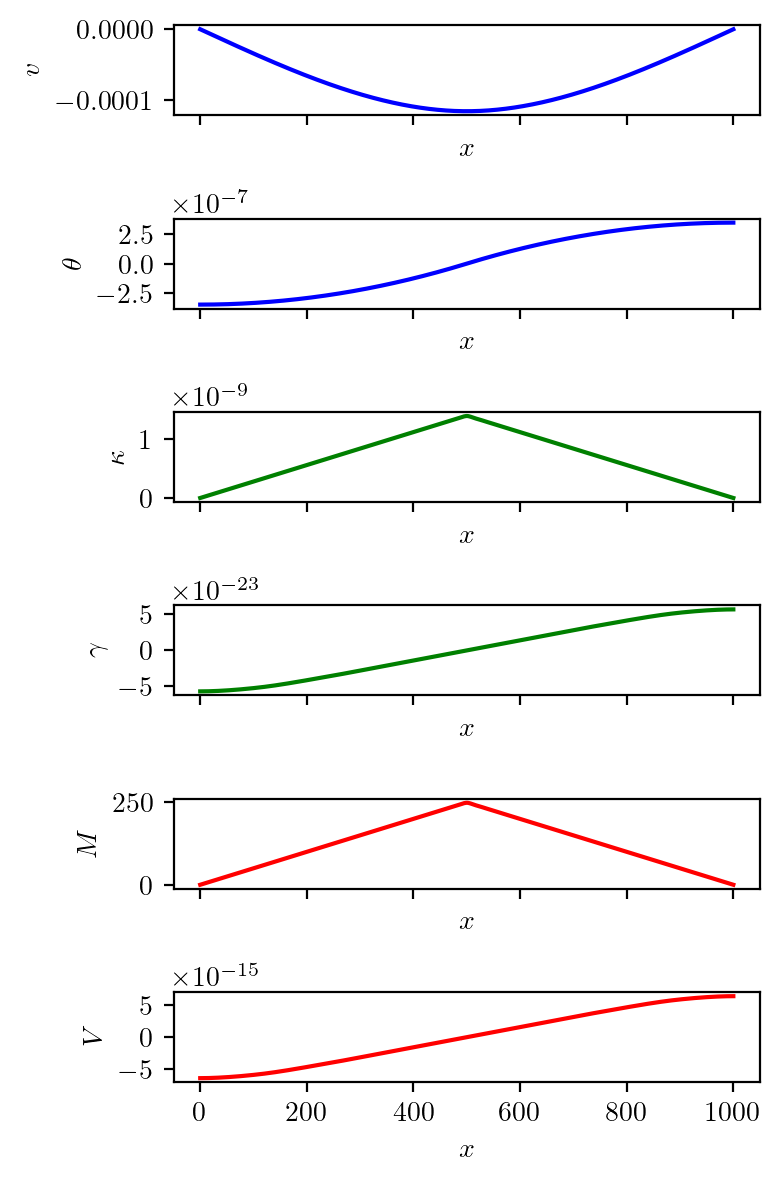

In [73]:
plot(x, solution["distributed", "LC6"])

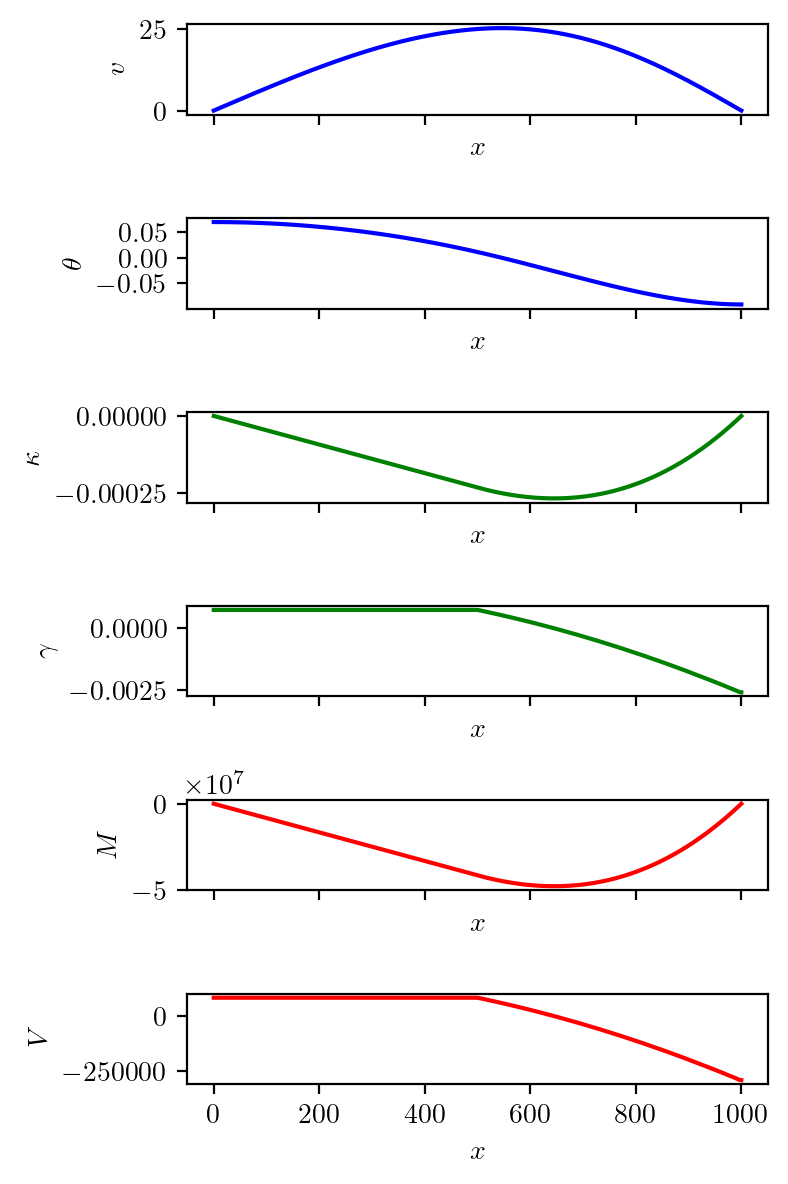

In [74]:
plot(x, solution["distributed", "LC3"])

### Euler-Bernoulli Beam

In [75]:
beam = NavierBeam(L, 100, EI=EI)
solution = beam.solve(loads, x)

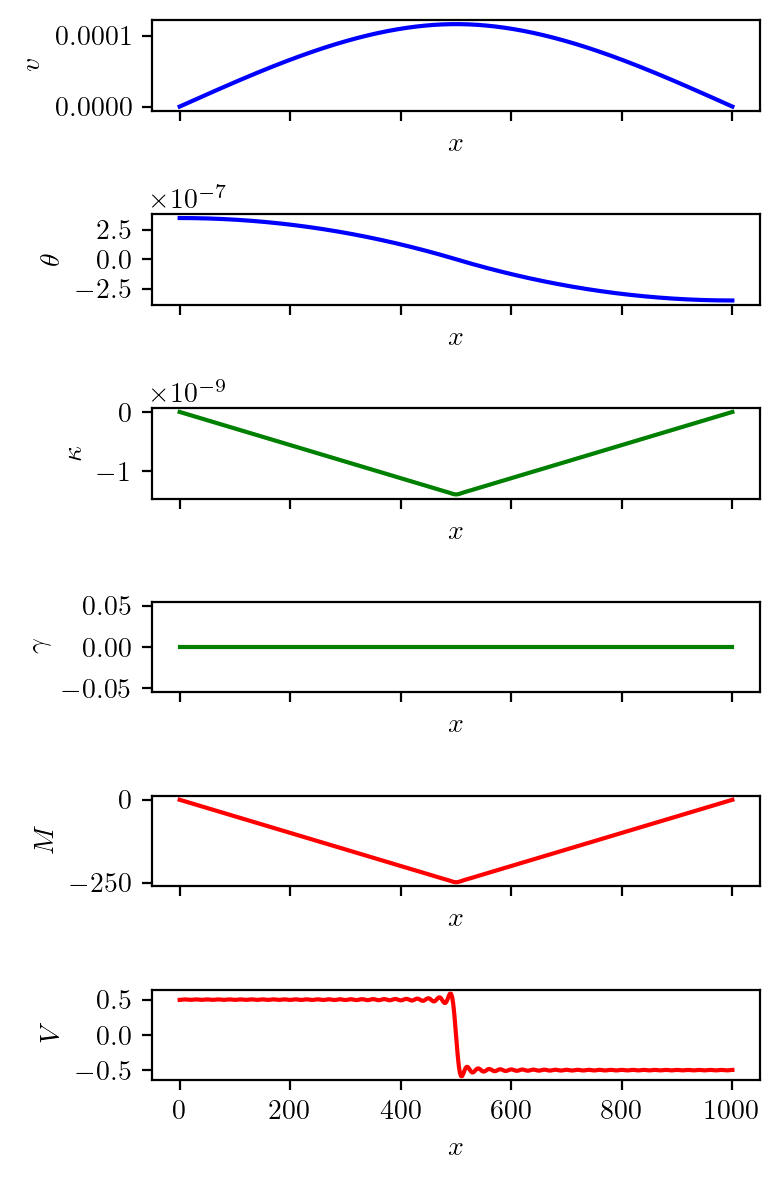

In [76]:
plot(x, solution["concentrated", "LC1"])

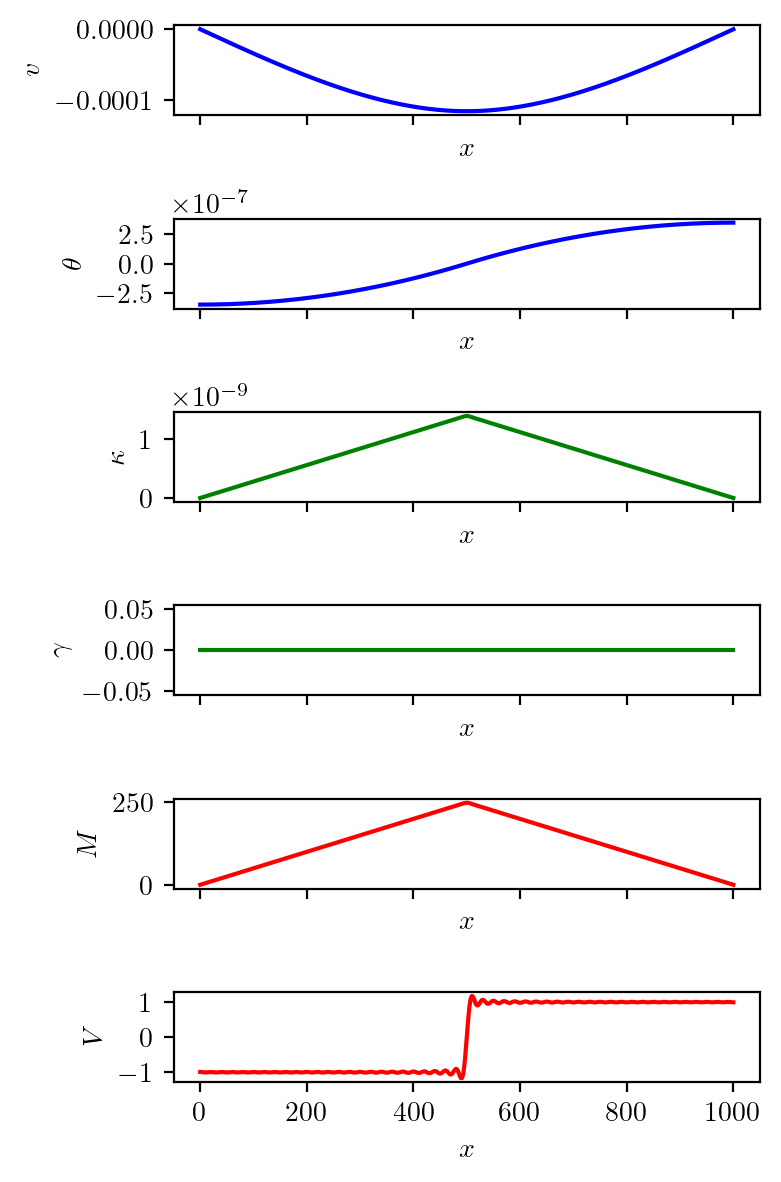

In [77]:
plot(x, solution["distributed", "LC6"])